In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/wide-10krounds-5folds.pkl']

In [5]:
top_k = 1000000

In [6]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

104

In [7]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)
best_min_dev.groupby(['file', 'experiment_id']).ngroups

103

In [8]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)
true_best.groupby(['file', 'experiment_id']).ngroups

107

In [9]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [10]:
best_mean_dev[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000000.0,0.790645,0.018990,0.754579,0.774477,0.792257,0.804200,0.832947
mean_validation_auc,1000000.0,0.770830,0.020626,0.721792,0.752917,0.771324,0.787106,0.810696
mean_whole_validation_auc,1000000.0,0.776492,0.017913,0.700661,0.765353,0.781013,0.790513,0.811813
max_overfit_auc,1000000.0,0.022355,0.018415,0.009049,0.014278,0.017418,0.022804,0.189381
min_dev_auc,1000000.0,0.771143,0.043837,0.500000,0.759811,0.777586,0.792952,0.822516
min_validation_auc,1000000.0,0.759876,0.043640,0.500000,0.745842,0.767209,0.783141,0.808016
min_whole_validation_auc,1000000.0,0.773909,0.020508,0.650200,0.762892,0.776924,0.789050,0.811158


In [11]:
best_min_dev[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000000.0,0.789856,0.020157,0.746103,0.774375,0.792257,0.804200,0.832947
mean_validation_auc,1000000.0,0.769765,0.022212,0.720333,0.752052,0.771324,0.787106,0.810696
mean_whole_validation_auc,1000000.0,0.774470,0.023600,0.564166,0.764219,0.778856,0.790533,0.811813
max_overfit_auc,1000000.0,0.022050,0.018520,0.008687,0.013752,0.016885,0.022234,0.190450
min_dev_auc,1000000.0,0.776398,0.021075,0.738137,0.759811,0.777586,0.792952,0.822516
min_validation_auc,1000000.0,0.764526,0.023994,0.698518,0.745842,0.767209,0.783141,0.808016
min_whole_validation_auc,1000000.0,0.771976,0.027891,0.460718,0.761566,0.775525,0.789275,0.811158


In [12]:
true_best[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000000.0,0.778341,0.056585,0.500000,0.770011,0.792250,0.804200,0.832947
mean_validation_auc,1000000.0,0.760733,0.053181,0.500000,0.751343,0.771318,0.787106,0.810696
mean_whole_validation_auc,1000000.0,0.780188,0.014687,0.749026,0.768358,0.782520,0.791748,0.811813
max_overfit_auc,1000000.0,0.021544,0.018748,0.000000,0.013584,0.016802,0.021972,0.187665
min_dev_auc,1000000.0,0.756784,0.073958,0.500000,0.757101,0.777586,0.792952,0.822516
min_validation_auc,1000000.0,0.747366,0.071382,0.500000,0.743213,0.767207,0.783141,0.808016
min_whole_validation_auc,1000000.0,0.778656,0.014925,0.749026,0.766380,0.780905,0.790453,0.811158


In [13]:
best = best_mean_dev

In [14]:
best.shape

(1000000, 61)

In [15]:
best.groupby(SET_PARAMETERS + ['file', 'experiment_id']).size().groupby(SET_PARAMETERS).size()

param_is_unbalance  param_boost_from_average
False               False                       10
                    True                        14
True                False                       55
                    True                        25
dtype: int64

In [16]:
best['param_bagging_enable'] = (best.param_bagging_freq != 0)
best.groupby('param_bagging_enable').size()

param_bagging_enable
False    625468
True     374532
dtype: int64

In [17]:
best['param_feature_fraction_enable'] = (best.param_feature_fraction != 1)
best.groupby('param_feature_fraction_enable').size()

param_feature_fraction_enable
True    1000000
dtype: int64

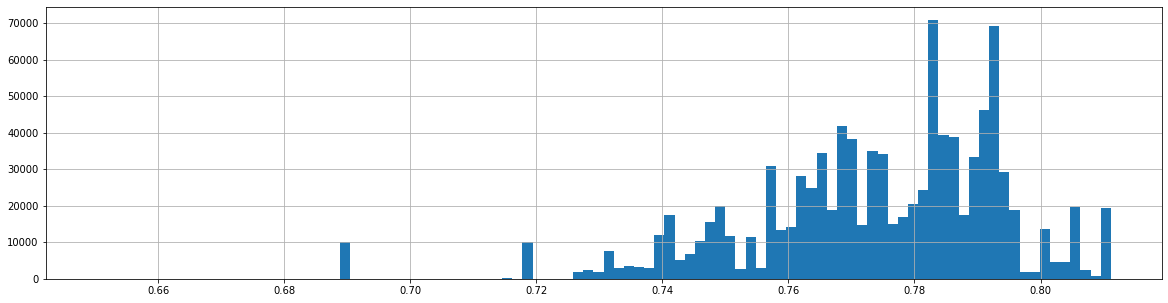

In [18]:
best.min_whole_validation_auc.hist(bins=100);

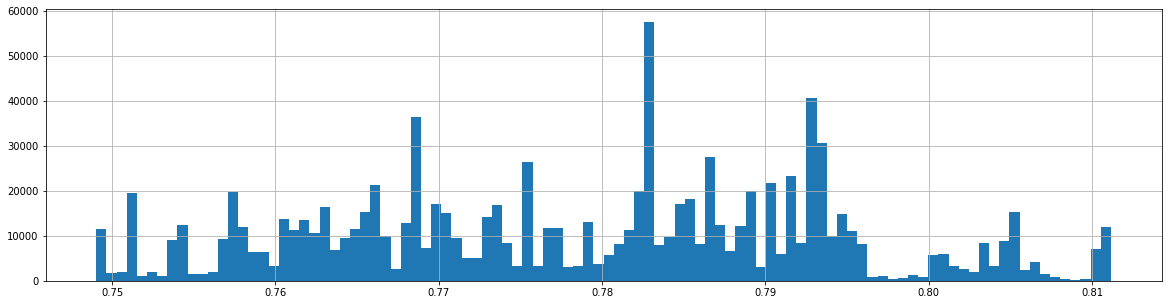

In [19]:
true_best.min_whole_validation_auc.hist(bins=100);

In [20]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

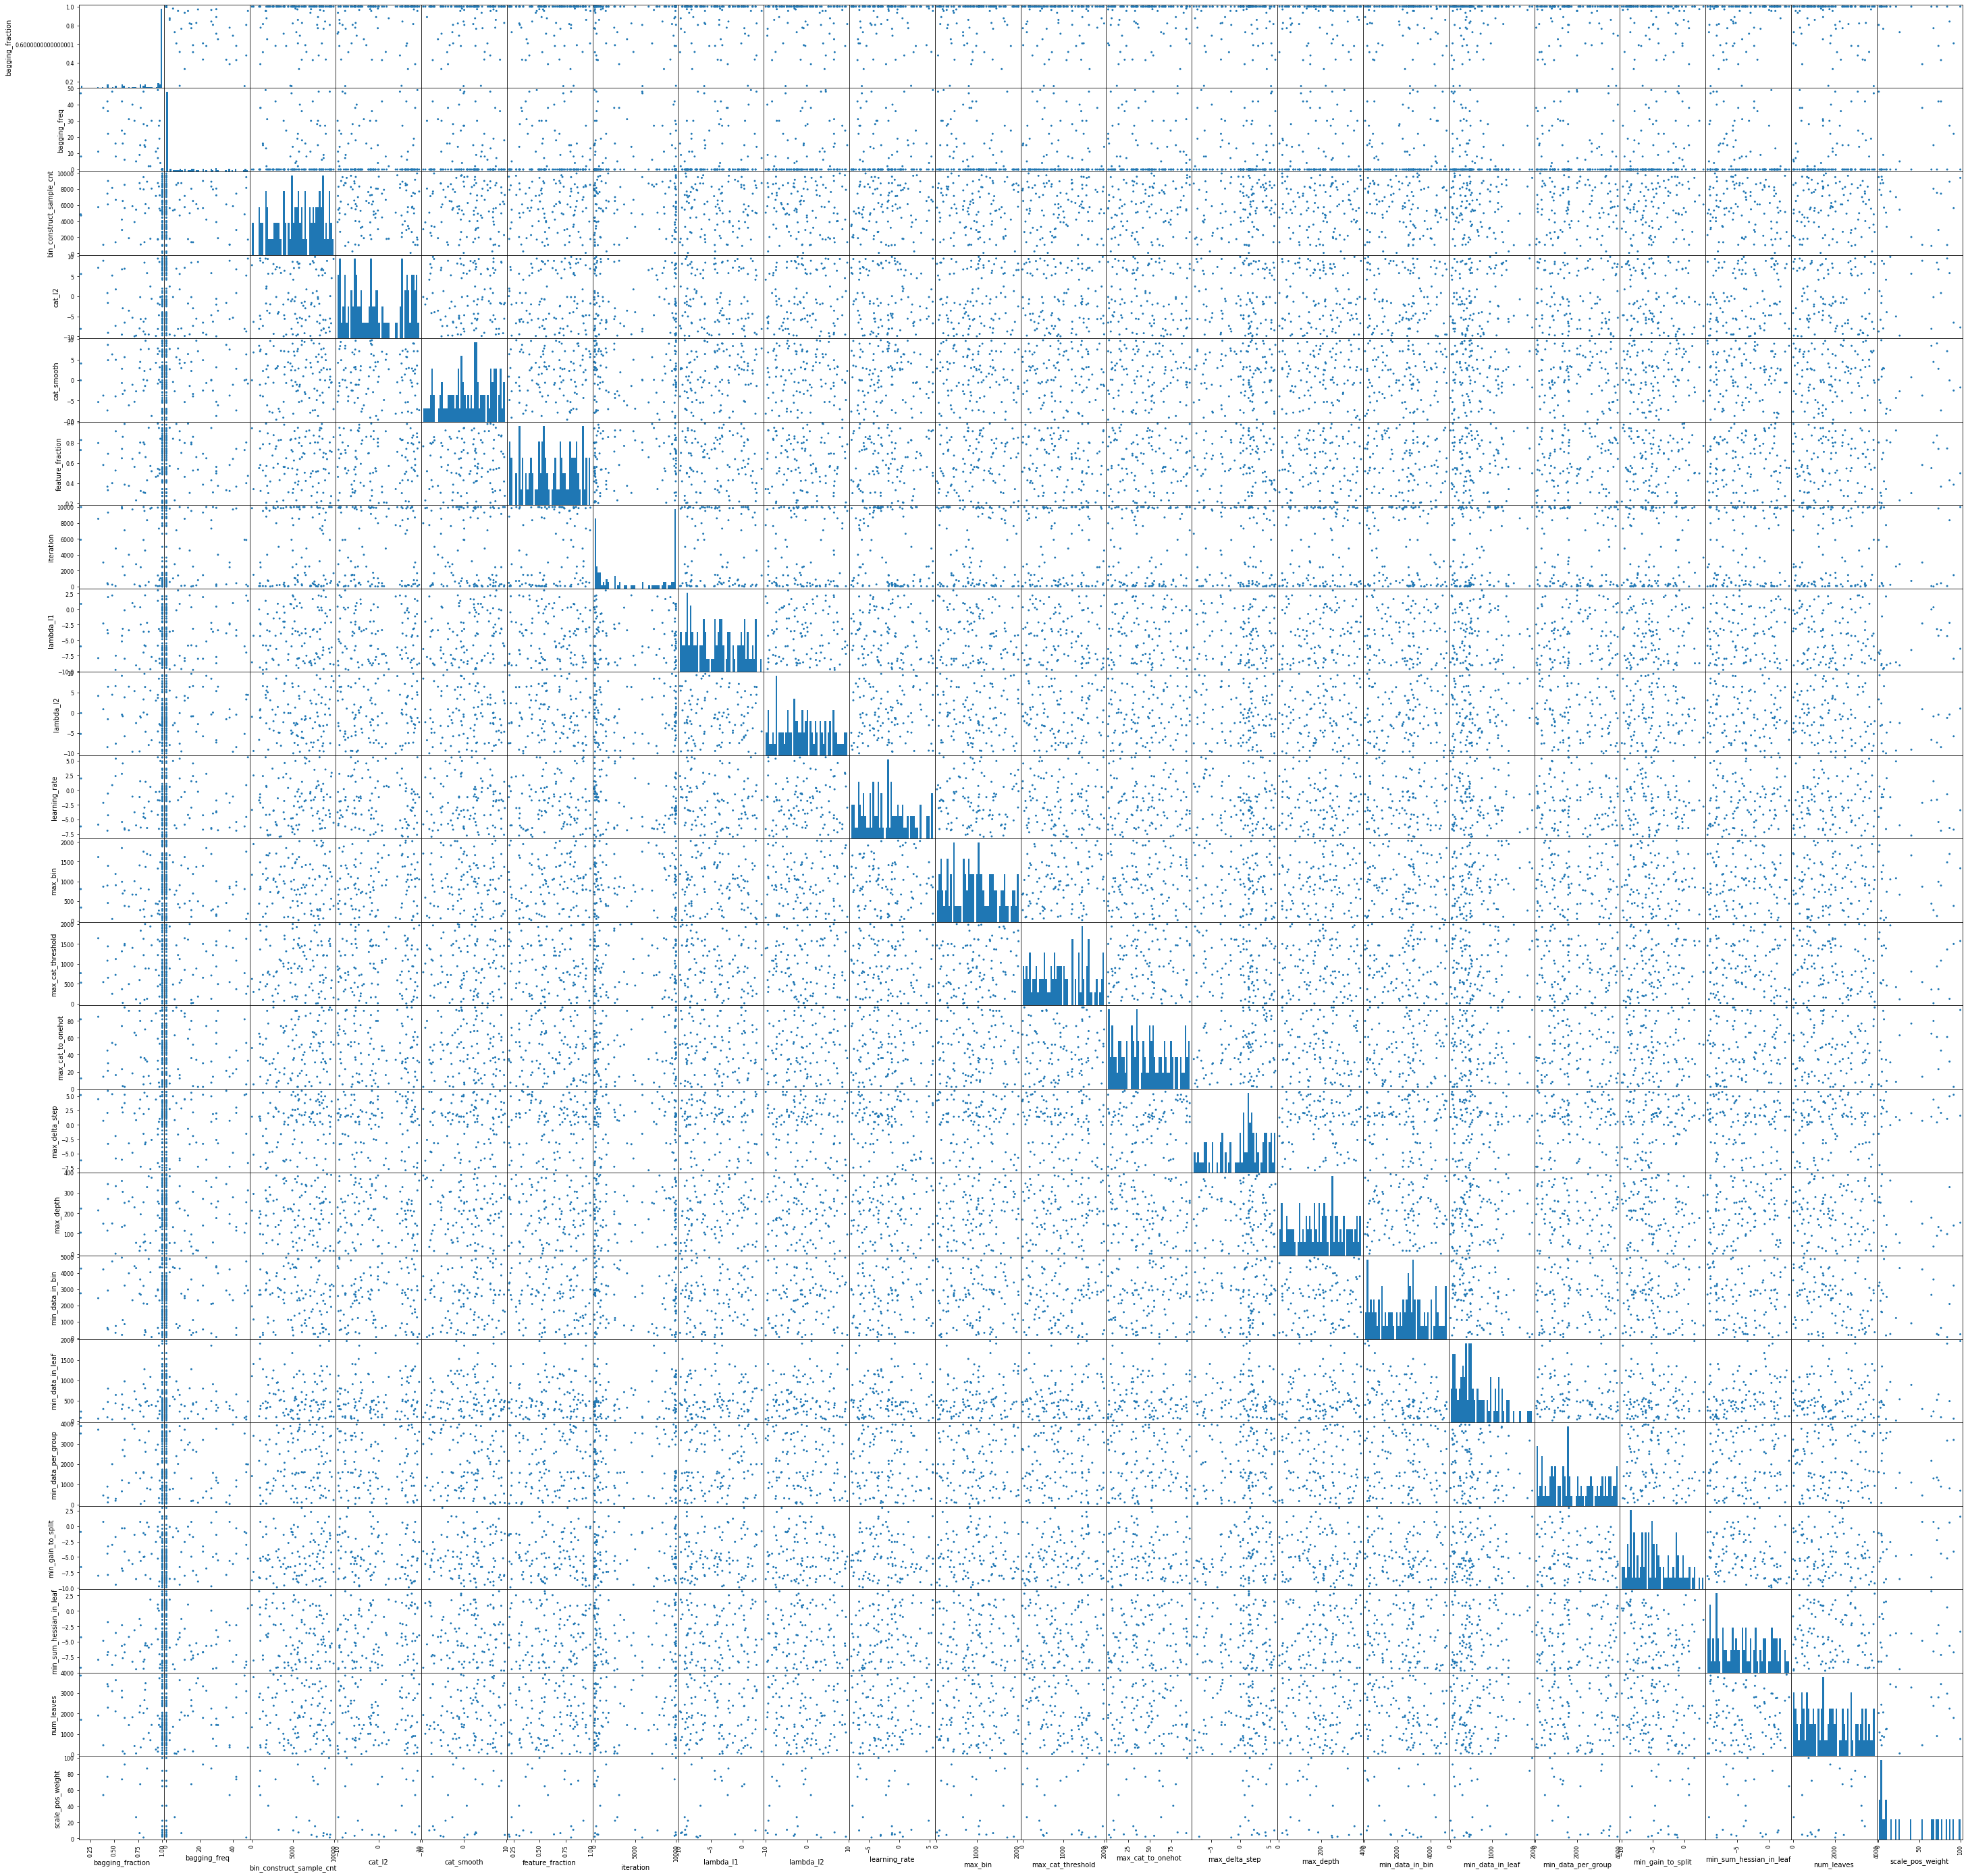

In [21]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [22]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable', 'param_feature_fraction_enable'])\
    .quantile([0, 1]).T
best_range

,0.0,1.0
param_bagging_fraction,1.502129e-01,1.000000e+00
param_bagging_freq,0.000000e+00,4.900000e+01
param_bin_construct_sample_cnt,4.700000e+01,9.947000e+03
param_cat_l2,1.033922e-10,6.788825e+09
param_cat_smooth,2.219692e-10,4.950280e+09
param_feature_fraction,2.007237e-01,9.904119e-01
param_lambda_l1,1.626069e-10,1.010093e+03
param_lambda_l2,1.031612e-10,4.623739e+09
param_learning_rate,1.286332e-08,3.575154e+05
param_max_bin,1.900000e+01,2.032000e+03


In [23]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(4460000, 61)

In [24]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(446, 59)

In [25]:
limited_bad = limited_best_iteration[limited_best_iteration.min_whole_validation_auc < 0.6]

In [26]:
limited_bad.shape

(232, 59)

TODO pikachu with bruises reaction

### top parameters

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pd.read_pickle('./experiments/wide-10krounds-5folds.pkl')\
          .sort_values('mean_train_auc').groupby('experiment_id').last()\
          .sort_values('mean_train_auc', ascending=False).head(2).T)

experiment_id                                                73   \
cnt                                                            3   
iteration                                                  10000   
max_dev_auc                                             0.755711   
max_dev_binary_logloss                                  0.911291   
max_overfit_auc                                         0.255386   
max_overfit_binary_logloss                             -0.240913   
max_validation_auc                                       0.75001   
max_validation_binary_logloss                           0.909192   
max_whole_train_auc                                     0.958421   
max_whole_train_binary_logloss                          0.275437   
max_whole_validation_auc                                0.736414   
max_whole_validation_binary_logloss                     0.875161   
mean_dev_auc                                            0.727708   
mean_dev_binary_logloss                         